## Train ESN on ENSO TDE data

reproduce work from project

In [22]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [23]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project

In [24]:
# read input data into dictionary
data = Dict()

data["full"] = CSV.read("data/sst_data/sst_34_anomaly_embedded.txt", DataFrame; delim=',', ignorerepeated=true, header=false)
data["train_data_80"] = CSV.read("data/sst_34_data_split_80/train_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)
data["test_data_80"] = CSV.read("data/sst_34_data_split_80/test_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)
data["val_data_80"] = CSV.read("data/sst_34_data_split_80/val_sst_34_anomaly_embedded_80.txt", DataFrame; delim=',', ignorerepeated=true)

# bring into correct format
data["full"] = Matrix(transpose(Matrix(data["full"])))
data["train_data_80"] = Matrix(transpose(Matrix(data["train_data_80"])))
data["test_data_80"] = Matrix(transpose(Matrix(data["test_data_80"])))
data["val_data_80"] = Matrix(transpose(Matrix(data["val_data_80"])))

data

Dict{Any, Any} with 4 entries:
  "full"          => [0.08 -0.2 … -0.84 -0.69; 0.27 0.86 … 0.88 1.07; … ; -0.33…
  "train_data_80" => [0.08 -0.2 … 0.43 0.75; 0.27 0.86 … 0.82 0.83; … ; -0.33 -…
  "val_data_80"   => [0.63 0.51 … 0.86 0.9; 1.02 1.26 … 0.75 0.6; … ; 0.02 -0.4…
  "test_data_80"  => [0.67 0.71 … -0.84 -0.69; 0.42 0.15 … 0.88 1.07; … ; -0.14…

In [25]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.1, 0.14]
input_scales = [0.1, 1.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [ 130]

param_grid_80 = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [26]:
esn_80, W_out_80, val_loss_80 = enso_project.cross_validate_esn(data["train_data_80"], data["val_data_80"], param_grid_80)

enso_project.ESNHyperparams(130, 0.8, 0.05, 0.1, 0.0)
Validation loss = 223240.07414745248
enso_project.ESNHyperparams(130, 0.9, 0.05, 0.1, 0.0)
Validation loss = 174.46448252285768
enso_project.ESNHyperparams(130, 0.8, 0.1, 0.1, 0.0)
Validation loss = 148.9947908736235
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 30.50979942909385
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-6)
Validation loss = 30.49596650913812
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-5)
Validation loss = 30.42386160998865


(ESN(5 => 130), OutputLayer successfully trained with output size: 5, 30.42386160998865)

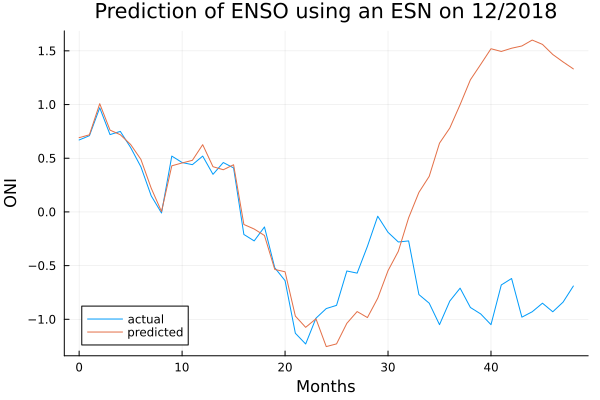

In [27]:
enso_project.plot_esn_prediction(esn_80, W_out_80, data["test_data_80"], "12/2018")

### Start prediction from later time steps

note: previous validation set starts at index 398. Test set starts at index 444 (i.e. December)

In [28]:
# store predictions
predictions = zeros(6, size(data["test_data_80"], 2));

method: keep training set fixed, change fraction of validation set to test set and retrain network.

In [29]:
pectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.1, 0.14, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [110, 120, 125, 130, 135, 140, 150, 160]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [30]:
#Feb
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:446], param_grid)
predictions[1,1:size(data["full"][:, 447:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 447:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 295.09526692105516
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 254.82760324295256
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 119.15047492174462
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 99.54369218871895
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 79.19605791432676
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 60.7458998729612


In [31]:
#Apr
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:448], param_grid)
predictions[2,1:size(data["full"][:, 449:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 449:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 304.2714708735921
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 281.9340285340517
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 123.96986411395909
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 105.91502874351755
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 83.05819813653801
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 62.880409149310594


In [32]:
#Jun
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:450], param_grid)
predictions[3,1:size(data["full"][:, 451:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 451:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 314.5076602185306
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 304.70150887496123
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 127.76079122160414
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 112.55464490002421
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 86.15090269614416
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 65.21368510122664


In [33]:
#Aug
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:452], param_grid)
predictions[4,1:size(data["full"][:, 453:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 453:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 322.14839950880616
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 319.19796056326396
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 131.4750793711897
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 121.69952559791304
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 89.88531838476811
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 66.98180656096152


In [34]:
#Oct
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:454], param_grid)
predictions[5,1:size(data["full"][:, 455:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 455:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 329.8568131945554
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 137.35075761564755
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 130.80031497975307
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 98.53062288069228
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 70.43546345377455


In [35]:
#Dec
esn, W_out, val_loss = enso_project.cross_validate_esn(data["train_data_80"], data["full"][:, 398:456], param_grid)
predictions[6,1:size(data["full"][:, 457:end],2)] = enso_project.esn_eval_pred(esn, W_out, data["full"][:, 457:end]);

enso_project.ESNHyperparams(110, 0.8, 0.05, 0.1, 0.0)
Validation loss = 339.58712147698736
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 143.08956613686416
enso_project.ESNHyperparams(125, 0.8, 0.1, 0.1, 0.0)
Validation loss = 140.91141560897276
enso_project.ESNHyperparams(125, 0.9, 0.14, 0.1, 0.0)
Validation loss = 109.57537497829638
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 77.06680827452278


In [43]:
predictions = predictions[:, 1:37] #make all same length
reference_data = data["full"][:, 457:end]

5×37 Matrix{Float64}:
  0.52   0.35   0.46   0.41  -0.21  …  -0.93  -0.85  -0.93  -0.84  -0.69
 -0.14  -0.52  -0.64  -1.13  -1.23     -0.01   0.19   0.47   0.88   1.07
 -0.9   -0.87  -0.55  -0.57  -0.32      1.53   1.59   1.9    1.99   1.78
 -0.19  -0.28  -0.27  -0.77  -0.85      1.24   0.81   0.31   0.24   0.21
 -0.83  -0.71  -0.89  -0.95  -1.05     -0.15  -0.28  -0.14  -0.62  -0.71

### Compare plots

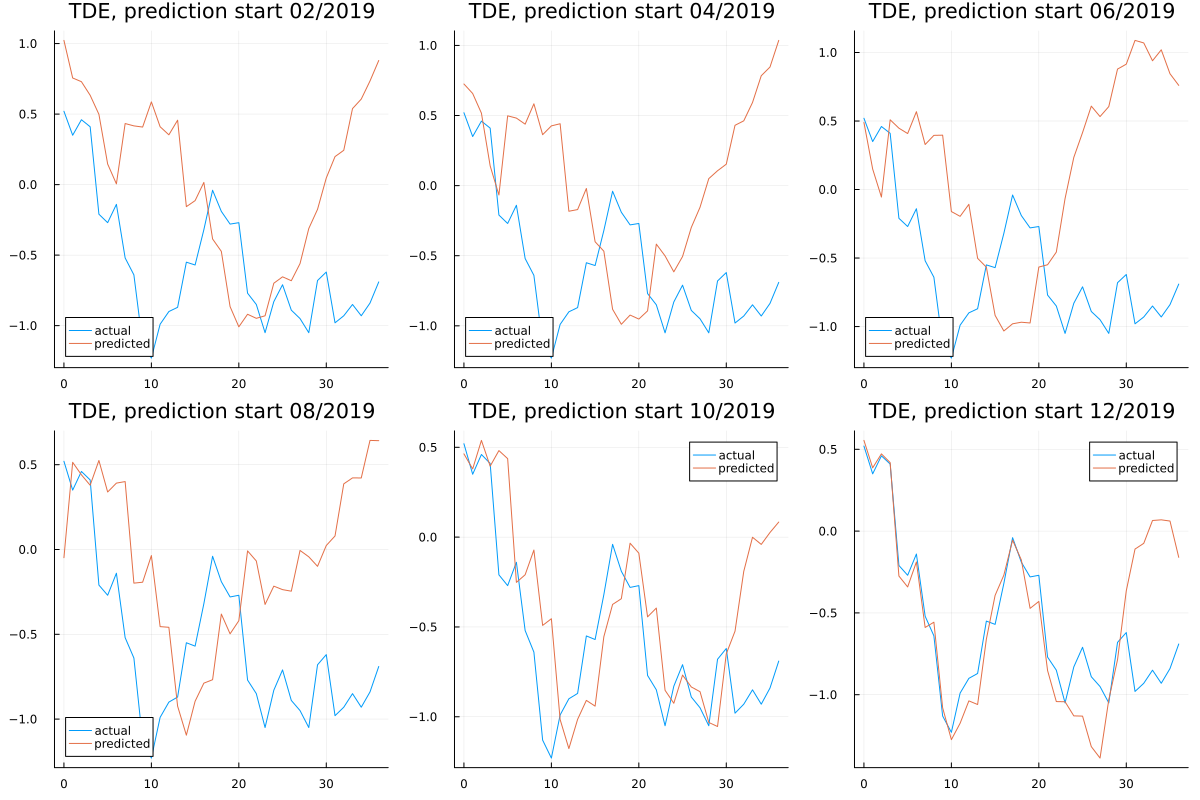

In [44]:
months = ["02/2019","04/2019","06/2019","08/2019","10/2019","12/2019"]
subplots = []
label = ["actual" "predicted"]
times =  collect(0:size(predictions,2))[1:end-1]
for i in eachindex(predictions[:,1])
    m = months[i]
    push!(subplots, plot(times, [reference_data[1,:], predictions[i, :]], label=label,  title="TDE, prediction start $m"))
end
plot(subplots..., layout=(2,3), size=(1200,800))